# <center> <img src="../img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> **Big Data** </center>
---
### <center> **Autumn 2025** </center>
---
### <center> **Examples on MapReduce with Apache Spark** </center>
---
**Profesor**: Pablo Camarillo Ramirez

# Find the PySpark Installation

In [2]:
import findspark
findspark.init()

# Create SparkSession

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Examples on Map Reduce") \
    .master("spark://2abf04f86c87:7077") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/10 05:35:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Example: Word counter
## Create the RDD

In [10]:
input = ["Lorem", "ipsum", "dolor", "Lorem", 53, 234.9345, 53]
rdd_input = sc.parallelize(input)

## Map Phase

In [11]:
rdd_map = rdd_input.map(lambda x: (x,1))
rdd_map.collect()

[('Lorem', 1),
 ('ipsum', 1),
 ('dolor', 1),
 ('Lorem', 1),
 (53, 1),
 (234.9345, 1),
 (53, 1)]

## Shuffle and Reduce Phases

In [12]:
rdd_reduced = rdd_map.reduceByKey(lambda x, y: x + y)
rdd_reduced.collect()

[('Lorem', 2), ('ipsum', 1), (234.9345, 1), ('dolor', 1), (53, 2)]

In [13]:
data = [
('fruit', 'apple'),
('fruit', 'banana'),
('vegetable', 'carrot')
]
rdd = sc.parallelize(data)
rdd.collect()

[('fruit', 'apple'), ('fruit', 'banana'), ('vegetable', 'carrot')]

In [24]:
group_rdd = rdd.groupByKey()
for k,v in group_rdd.collect():
    print(f"{k}: {list(v)}")

vegetable: ['carrot']
fruit: ['apple', 'banana']


In [44]:
words = ["apple", "banana", "apple", "orange",
"banana", "apple", "orange", "orange"]
words_rdd = sc.parallelize(words)
words_rdd.collect()
words_rdd.countByValue()

defaultdict(int, {'apple': 3, 'banana': 2, 'orange': 3})

## Collect results

# Example: Log Analysis
## Create RDD

In [28]:
lines = sc.textFile("/opt/spark/work-dir/data/web_access2.log")
lines.collect()

['u001,https://shop.example.com/,2025-09-09T12:03:14Z',
 'u002,https://shop.example.com/product/42,2025-09-07T12:04:10Z',
 'u001,https://shop.example.com/product/42,2025-09-07T12:07:55Z',
 'u001,https://shop.example.com/,2025-09-07T12:03:14Z',
 'u002,https://shop.example.com/product/42,2025-09-07T12:04:10Z',
 'u001,https://shop.example.com/product/42,2025-09-07T12:07:55Z',
 'u001,https://shop.example.com/,2025-09-07T12:03:14Z',
 'u002,https://shop.example.com/product/42,2025-09-09T12:04:10Z',
 'u001,https://shop.example.com/product/42,2025-09-07T12:07:55Z',
 'u001,https://shop.example.com/,2025-09-07T12:03:14Z',
 'u002,https://shop.example.com/product/42,2025-09-07T12:04:10Z',
 'u001,https://shop.example.com/product/42,2025-09-09T12:07:55Z',
 'u001,https://shop.example.com/,2025-09-07T12:03:14Z',
 'u002,https://shop.example.com/product/42,2025-09-09T12:04:10Z',
 'u001,https://shop.example.com/product/42,2025-09-07T12:07:55Z']

## Transform every line in a tuple

In [29]:
from pcamarillor.spark_utils import parse_line
records = lines.map(parse_line)
records.collect()

[('u001', 'https://shop.example.com/', '2025-09-09T12:03:14Z'),
 ('u002', 'https://shop.example.com/product/42', '2025-09-07T12:04:10Z'),
 ('u001', 'https://shop.example.com/product/42', '2025-09-07T12:07:55Z'),
 ('u001', 'https://shop.example.com/', '2025-09-07T12:03:14Z'),
 ('u002', 'https://shop.example.com/product/42', '2025-09-07T12:04:10Z'),
 ('u001', 'https://shop.example.com/product/42', '2025-09-07T12:07:55Z'),
 ('u001', 'https://shop.example.com/', '2025-09-07T12:03:14Z'),
 ('u002', 'https://shop.example.com/product/42', '2025-09-09T12:04:10Z'),
 ('u001', 'https://shop.example.com/product/42', '2025-09-07T12:07:55Z'),
 ('u001', 'https://shop.example.com/', '2025-09-07T12:03:14Z'),
 ('u002', 'https://shop.example.com/product/42', '2025-09-07T12:04:10Z'),
 ('u001', 'https://shop.example.com/product/42', '2025-09-09T12:07:55Z'),
 ('u001', 'https://shop.example.com/', '2025-09-07T12:03:14Z'),
 ('u002', 'https://shop.example.com/product/42', '2025-09-09T12:04:10Z'),
 ('u001', 'htt

## Filter data from yesterday

In [33]:
from datetime import datetime, timezone, timedelta
from pcamarillor.spark_utils import is_yesterday, to_domain
yesterday = (datetime.now(timezone.utc).date() - timedelta(days=3)).isoformat()
yesterday

'2025-09-07'

In [34]:
y_records = records.filter(lambda record: is_yesterday(record[2], yesterday))
y_records.collect()

[('u002', 'https://shop.example.com/product/42', '2025-09-07T12:04:10Z'),
 ('u001', 'https://shop.example.com/product/42', '2025-09-07T12:07:55Z'),
 ('u001', 'https://shop.example.com/', '2025-09-07T12:03:14Z'),
 ('u002', 'https://shop.example.com/product/42', '2025-09-07T12:04:10Z'),
 ('u001', 'https://shop.example.com/product/42', '2025-09-07T12:07:55Z'),
 ('u001', 'https://shop.example.com/', '2025-09-07T12:03:14Z'),
 ('u001', 'https://shop.example.com/product/42', '2025-09-07T12:07:55Z'),
 ('u001', 'https://shop.example.com/', '2025-09-07T12:03:14Z'),
 ('u002', 'https://shop.example.com/product/42', '2025-09-07T12:04:10Z'),
 ('u001', 'https://shop.example.com/', '2025-09-07T12:03:14Z'),
 ('u001', 'https://shop.example.com/product/42', '2025-09-07T12:07:55Z')]

## Reduce by domain, user

In [35]:
domain_user_ones = y_records.map(lambda record: ((to_domain(record[1]), record[0]), 1))
domain_user_ones.collect()

[(('shop.example.com', 'u002'), 1),
 (('shop.example.com', 'u001'), 1),
 (('shop.example.com', 'u001'), 1),
 (('shop.example.com', 'u002'), 1),
 (('shop.example.com', 'u001'), 1),
 (('shop.example.com', 'u001'), 1),
 (('shop.example.com', 'u001'), 1),
 (('shop.example.com', 'u001'), 1),
 (('shop.example.com', 'u002'), 1),
 (('shop.example.com', 'u001'), 1),
 (('shop.example.com', 'u001'), 1)]

In [36]:
unique_domain_user = domain_user_ones.reduceByKey(lambda a, b: 1)
unique_domain_user.collect()

[(('shop.example.com', 'u001'), 1), (('shop.example.com', 'u002'), 1)]

## Count unique users per domain

In [37]:
domain_ones = unique_domain_user.map(lambda kv: (kv[0][0], 1))
unique_visitors_per_domain = domain_ones.reduceByKey(lambda a, b: a + b)
unique_visitors_per_domain.collect()

[('shop.example.com', 2)]

# Get results

In [38]:
result = unique_visitors_per_domain.collect()
result

[('shop.example.com', 2)]

# Close SparkContext

In [39]:
sc.stop()

In [42]:
import random
names = [
    "Arantxa",
    "Daniel",
    "Francisco",
    "Ivan",
    "Xavier",
    "Mateo",
    "Luis",
    "Joss",
    "Rodrigo",
    "Eduardo",
    "Roberto",
    "Fernando",
    "Andre",
    "Renata"
]


problems = ["Temperatures from Celsius to Fahrenheit", " Extract Timestamps", "Counting words"]
assignments = {student: random.choice(problems) for student in names}
for s, p in assignments.items():
    print(f"{s} -> {p}")

Arantxa -> Temperatures from Celsius to Fahrenheit
Daniel ->  Extract Timestamps
Francisco -> Counting words
Ivan ->  Extract Timestamps
Xavier ->  Extract Timestamps
Mateo -> Temperatures from Celsius to Fahrenheit
Luis ->  Extract Timestamps
Joss ->  Extract Timestamps
Rodrigo ->  Extract Timestamps
Eduardo ->  Extract Timestamps
Roberto -> Temperatures from Celsius to Fahrenheit
Fernando -> Temperatures from Celsius to Fahrenheit
Andre ->  Extract Timestamps
Renata -> Temperatures from Celsius to Fahrenheit


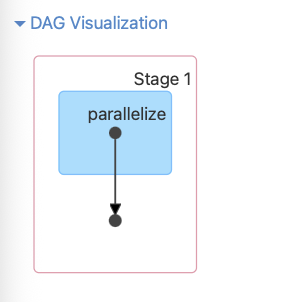

In [7]:
logs = [
"2023-10-01 12:00:00 INFO: System started",
"2023-10-01 12:05:00 ERROR: Disk full",
"2023-10-01 12:10:00 INFO: Backup completed"
]
rdd = sc.parallelize(logs)

In [8]:
timestamps_rdd = rdd.map(lambda log_line: log_line.split(' ')[1])

extracted_timestamps = timestamps_rdd.collect()

print(f"Extracted Timestamps: {extracted_timestamps}")

Extracted Timestamps: ['12:00:00', '12:05:00', '12:10:00']
